# EXPLORATORY NOTEBOOK

In [1]:
#python libraries
import pandas as pd
import numpy as np
import os

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
#import 
from env import hostname, user, password
import wrangle as w
import explore as e

#Import scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



#turn of warnings 
import warnings
warnings.filterwarnings("ignore")

## ACQUIRE DATA

In [2]:
#Acquire Zillow_2017 data and query necessary columns
df = w.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,lotsizesquarefeet,longitude,latitude
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0,4506.0,-117869207.0,33634931.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0,12647.0,-119281531.0,34449266.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0,8432.0,-117823170.0,33886168.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0,13038.0,-118240722.0,34245180.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0,63000.0,-118179824.0,34145202.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52441 non-null  float64
 1   bathroomcnt                   52441 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   taxvaluedollarcnt             52440 non-null  float64
 4   yearbuilt                     52325 non-null  float64
 5   fips                          52441 non-null  float64
 6   lotsizesquarefeet             52072 non-null  float64
 7   longitude                     52441 non-null  float64
 8   latitude                      52441 non-null  float64
dtypes: float64(9)
memory usage: 3.6 MB


In [4]:
df.shape

(52441, 9)

In [5]:
df.isnull().sum()

bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     82
taxvaluedollarcnt                 1
yearbuilt                       116
fips                              0
lotsizesquarefeet               369
longitude                         0
latitude                          0
dtype: int64

## PREPARE DATA

In [6]:
# Prepared data by renamed columns to enhance readability. Dropped null values & duplicates.
df = w.prep_zillow(df)
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,county,lot_size,longitude,latitude
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0,4506.0,-117869207.0,33634931.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0,12647.0,-119281531.0,34449266.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0,8432.0,-117823170.0,33886168.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0,13038.0,-118240722.0,34245180.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0,63000.0,-118179824.0,34145202.0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51842 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    51842 non-null  float64
 1   bathrooms   51842 non-null  float64
 2   sqft        51842 non-null  float64
 3   tax_value   51842 non-null  float64
 4   year_built  51842 non-null  float64
 5   county      51842 non-null  float64
 6   lot_size    51842 non-null  float64
 7   longitude   51842 non-null  float64
 8   latitude    51842 non-null  float64
dtypes: float64(9)
memory usage: 4.0 MB


In [8]:
df.isnull().sum()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
county        0
lot_size      0
longitude     0
latitude      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51842 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    51842 non-null  float64
 1   bathrooms   51842 non-null  float64
 2   sqft        51842 non-null  float64
 3   tax_value   51842 non-null  float64
 4   year_built  51842 non-null  float64
 5   county      51842 non-null  float64
 6   lot_size    51842 non-null  float64
 7   longitude   51842 non-null  float64
 8   latitude    51842 non-null  float64
dtypes: float64(9)
memory usage: 4.0 MB


In [10]:
df.shape

(51842, 9)

In [11]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,county,lot_size,longitude,latitude
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0,4506.0,-117869207.0,33634931.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0,12647.0,-119281531.0,34449266.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0,8432.0,-117823170.0,33886168.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0,13038.0,-118240722.0,34245180.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0,63000.0,-118179824.0,34145202.0


In [12]:
df.bedrooms.value_counts()

3.0     23212
4.0     15083
2.0      8242
5.0      3910
6.0       626
1.0       577
7.0       103
0.0        54
8.0        24
9.0         8
10.0        2
11.0        1
Name: bedrooms, dtype: int64

In [13]:
#master clean renames fips to County, removes outliers for bedrooms, bathrooms, and sqft columns & changes data types integers
df = w.master_clean_zillow(df)
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,county,lot_size,longitude,latitude
0,4,3,3100,1023282.0,1998,Orange Cty,4506,-117869207,33634931
1,2,1,1465,464000.0,1967,Ventura,12647,-119281531,34449266
2,3,2,1243,564778.0,1962,Orange Cty,8432,-117823170,33886168
3,4,3,2376,145143.0,1970,Los Angeles,13038,-118240722,34245180
4,4,3,2962,773303.0,1950,Los Angeles,63000,-118179824,34145202


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50283 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    50283 non-null  int64  
 1   bathrooms   50283 non-null  int64  
 2   sqft        50283 non-null  int64  
 3   tax_value   50283 non-null  float64
 4   year_built  50283 non-null  object 
 5   county      50283 non-null  object 
 6   lot_size    50283 non-null  int64  
 7   longitude   50283 non-null  int64  
 8   latitude    50283 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 3.8+ MB


In [15]:
df.shape

(50283, 9)

In [16]:
df.bedrooms.value_counts()

3    22924
4    14629
2     8189
5     3500
1      565
6      476
Name: bedrooms, dtype: int64

In [17]:
df.bathrooms.value_counts()

2    25552
3    11173
1    10270
4     2470
5      691
6      127
Name: bathrooms, dtype: int64

In [18]:
df.lot_size.describe()

count    5.028300e+04
mean     1.078467e+04
std      8.740701e+04
min      2.360000e+02
25%      5.544500e+03
50%      6.775000e+03
75%      8.578000e+03
max      6.971010e+06
Name: lot_size, dtype: float64

<Axes: xlabel='lot_size', ylabel='tax_value'>

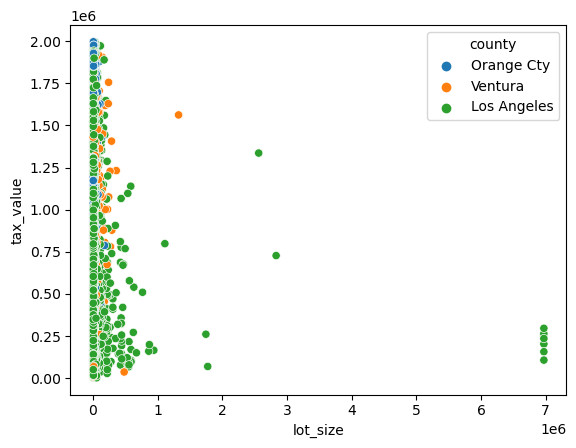

In [19]:
sns.scatterplot(x= 'lot_size', y="tax_value", data=df, hue = 'county')

In [20]:
df.sqft.describe()

count    50283.000000
mean      1842.036653
std        821.673467
min        152.000000
25%       1259.000000
50%       1634.000000
75%       2234.000000
max       8615.000000
Name: sqft, dtype: float64

#### <span style= 'color:green'> Outliers are sale_tax $40+ and any sqft above 8K

<Axes: xlabel='sqft', ylabel='tax_value'>

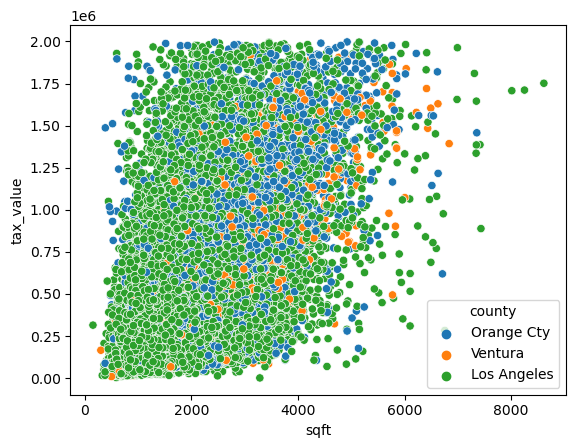

In [21]:
sns.scatterplot(x= 'sqft', y="tax_value", data=df, hue = 'county')

In [22]:
# Clean data devided by original data = percent of original data maintained after preparation and cleaning process 
50282/52441

0.9588299231517324

## SPLIT DATA

In [23]:
#Data split into train, validate, test
train, validate, test = w.split_zillow(df)

In [24]:
train.dtypes

bedrooms        int64
bathrooms       int64
sqft            int64
tax_value     float64
year_built     object
county         object
lot_size        int64
longitude       int64
latitude        int64
dtype: object

In [25]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,county,lot_size,longitude,latitude
2178,4,1,2499,338176.0,1953,Los Angeles,112751,-118169467,34635282
37565,4,1,1301,66016.0,1944,Los Angeles,5458,-118138053,33866686
48602,4,4,3789,1158000.0,1999,Ventura,13546,-118966992,34158979
41120,3,2,1352,564482.0,1928,Los Angeles,4799,-118364216,34142966
35722,3,2,1413,405145.0,1941,Los Angeles,6868,-118120842,33983891


In [26]:
# Datasets split into  50%, 30%, and 20% data previously cleaned so no missed values nulls and outliers removed
w.print_train(train, validate, test)

Train shape: (30169, 9)
Validate shape: (10057, 9)
Test shape: (10057, 9)


## Exploratory Analysis

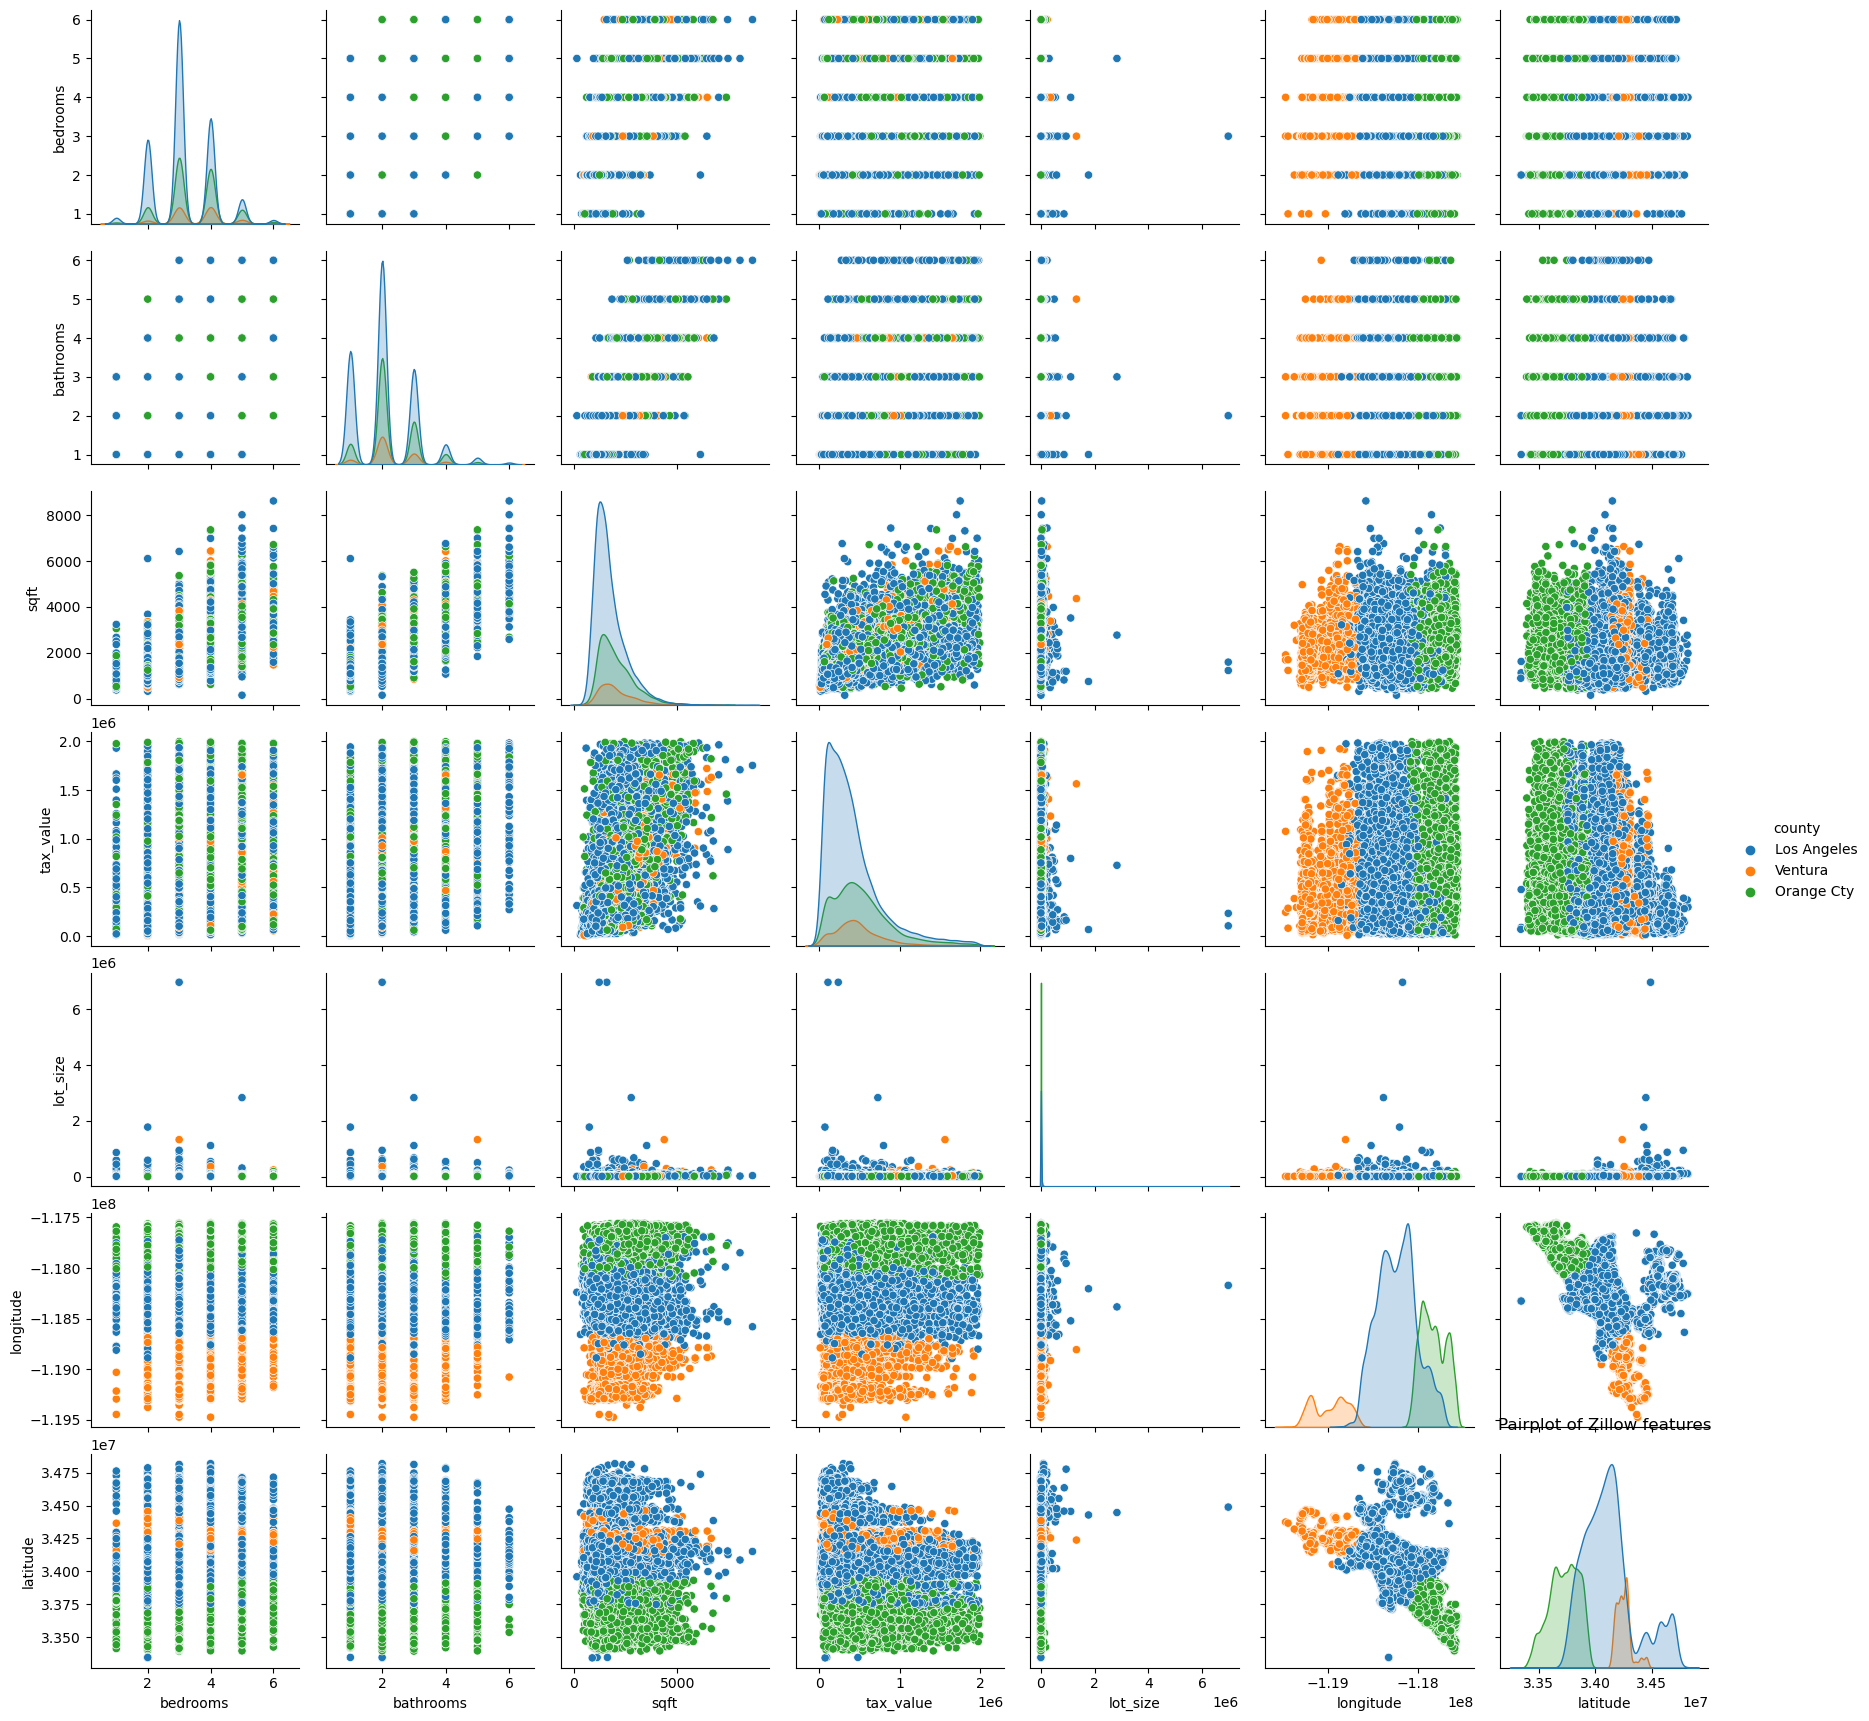

In [27]:
# Pairplot of features to determine which ones will best represent the data and questions asked?
sns.pairplot(train, hue = 'county')
plt.title('Pairplot of Zillow features')
plt.show()

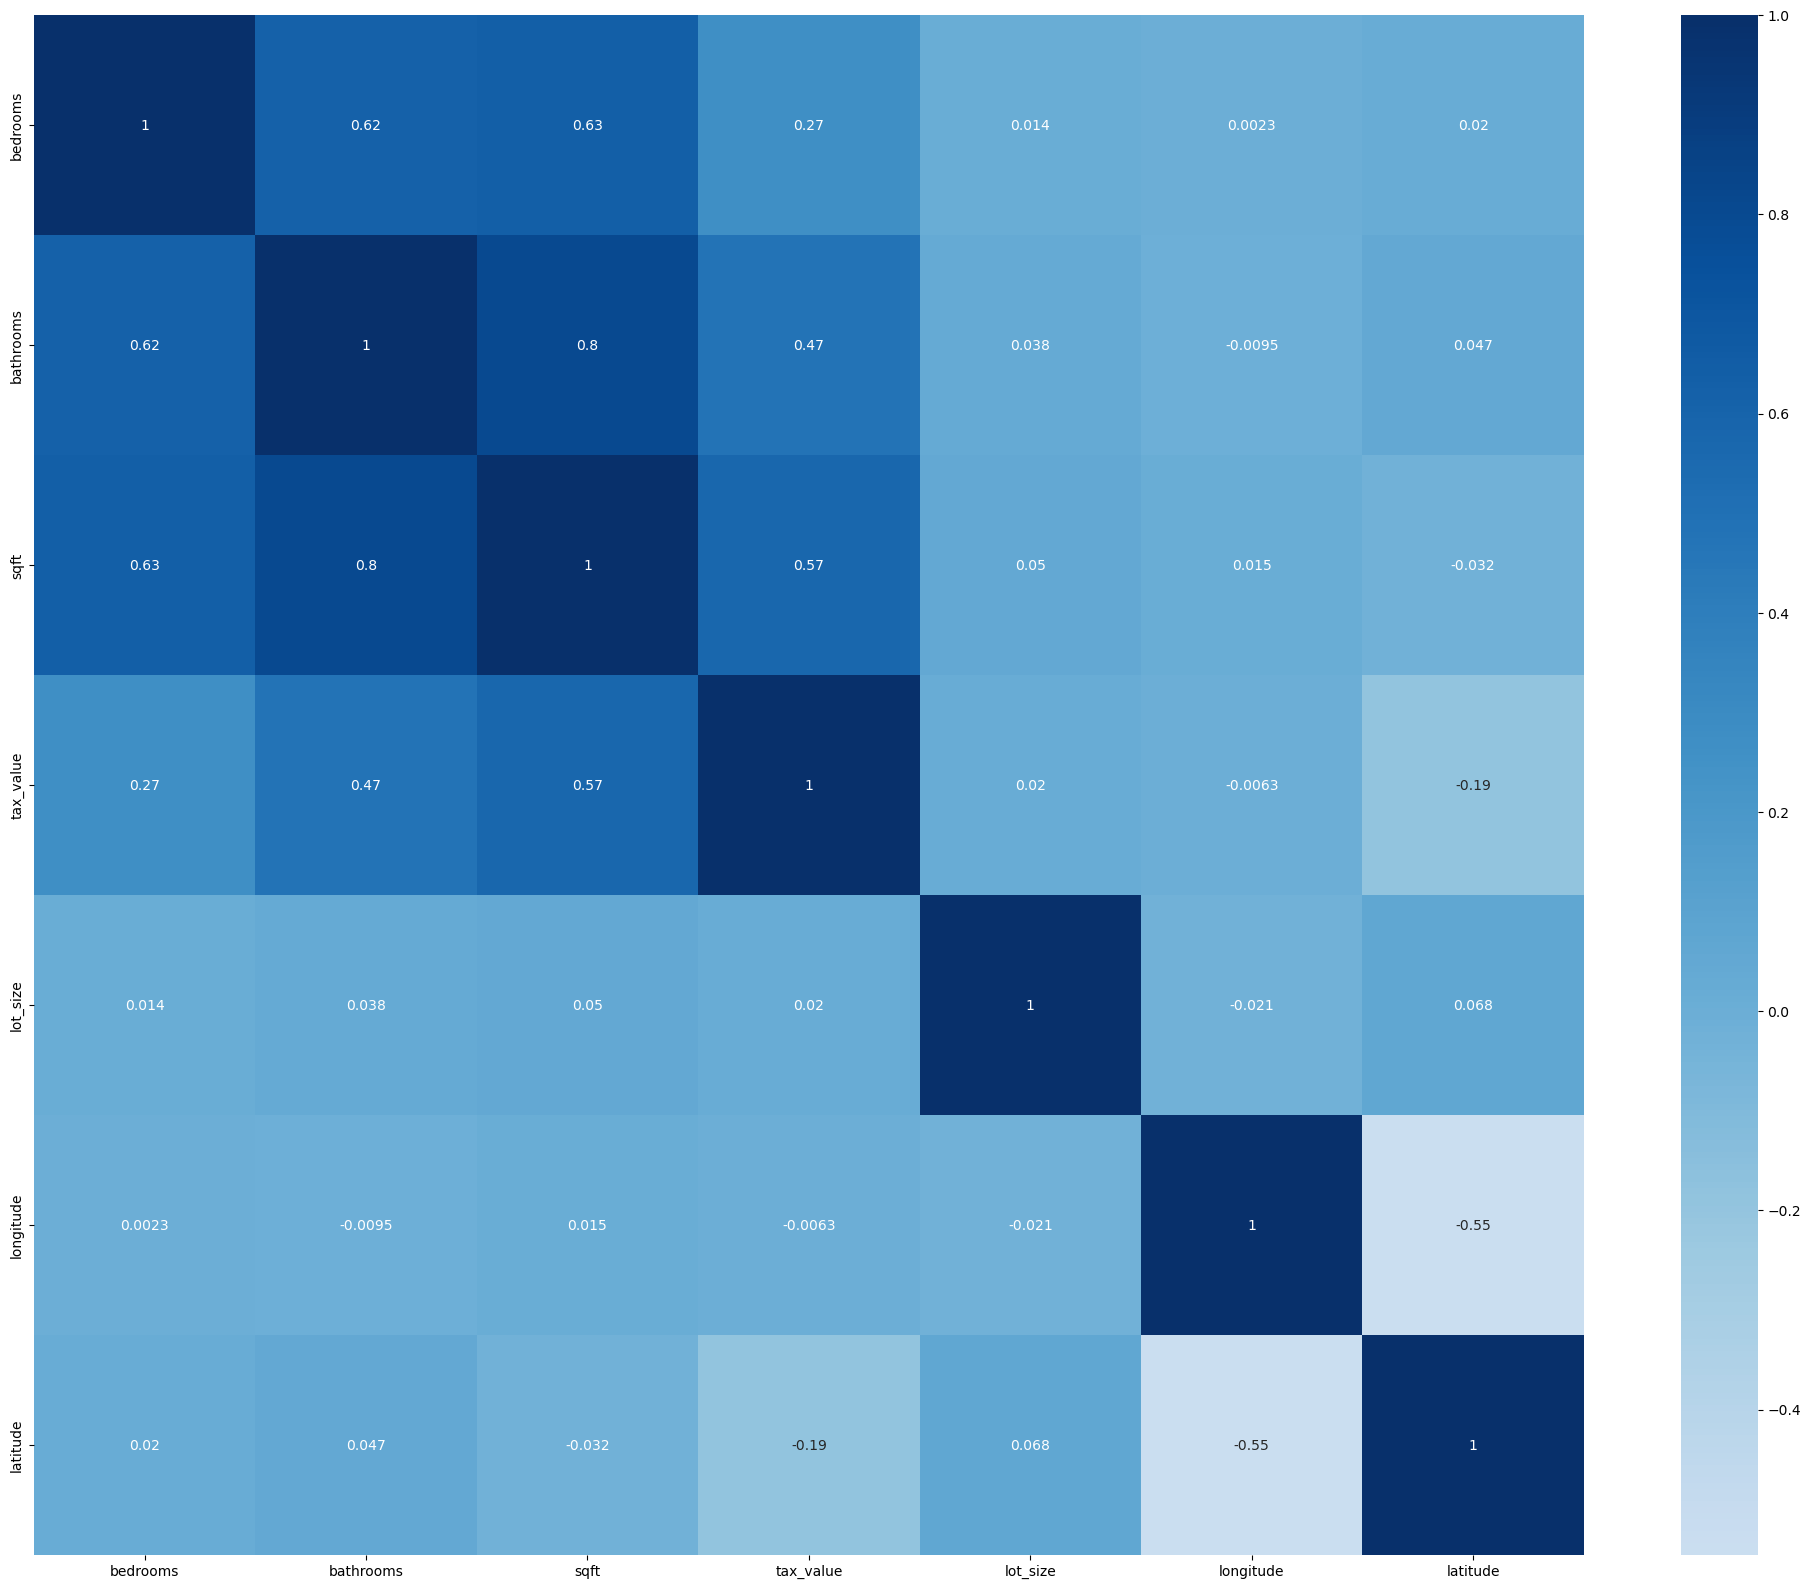

In [28]:
#Visualizing correlation data with Heat Map
plt.figure(figsize=(25,20))
sns.heatmap(train.corr(), cmap='Blues', center=0, annot=True)

plt.show()

In [29]:
#Explore correlation data by churn
train_correlation = train.corr()
train_correlation

,bedrooms,bathrooms,sqft,tax_value,lot_size,longitude,latitude
bedrooms,1.000000,0.616952,0.632046,0.269913,0.014222,0.002280,0.019570
bathrooms,0.616952,1.000000,0.802906,0.474557,0.037619,-0.009545,0.047399
sqft,0.632046,0.802906,1.000000,0.573781,0.050431,0.015242,-0.031569
tax_value,0.269913,0.474557,0.573781,1.000000,0.020014,-0.006312,-0.188127
lot_size,0.014222,0.037619,0.050431,0.020014,1.000000,-0.020933,0.067502
longitude,0.002280,-0.009545,0.015242,-0.006312,-0.020933,1.000000,-0.546209
latitude,0.019570,0.047399,-0.031569,-0.188127,0.067502,-0.546209,1.000000


In [30]:
#This is a scatter plot that shows How the counties appear on a map using longitude and latitutde lines 
def california_county(train):
    fig, ax = plt.subplots(figsize = (7,5))
    sns.scatterplot(data=train,x=train['longitude'],
                y=train['latitude'], zorder=1,hue='county')
plt.show()

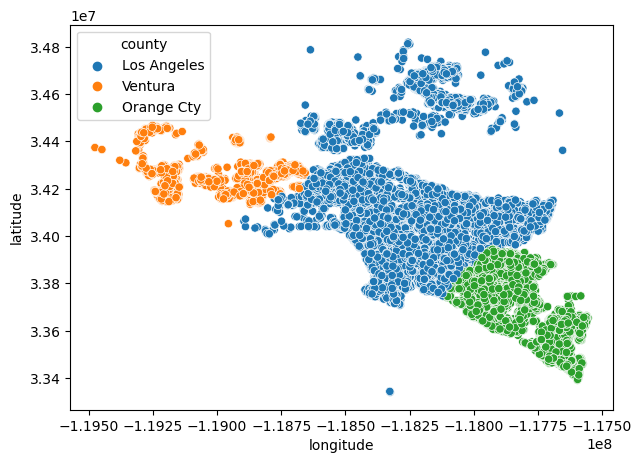

In [31]:
california_county(train)

In [42]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,county,lot_size,longitude,latitude
2178,4,1,2499,338176.0,1953,Los Angeles,112751,-118169467,34635282
37565,4,1,1301,66016.0,1944,Los Angeles,5458,-118138053,33866686
48602,4,4,3789,1158000.0,1999,Ventura,13546,-118966992,34158979
41120,3,2,1352,564482.0,1928,Los Angeles,4799,-118364216,34142966
35722,3,2,1413,405145.0,1941,Los Angeles,6868,-118120842,33983891


In [61]:
to_scale = ['bedrooms', 'bathrooms', 'sqft', 'lot_size']

In [62]:
type(to_scale)

list

In [68]:

def visualize_scaler(scaler, df, features_to_scale, bins=50):
    # Create subplot structure
    fig, axs = plt.subplots(len(features_to_scale), 2, figsize=(12, 12))

    # Copy the df for scaling
    df_scaled = df.copy()

    # Fit and transform the df
    df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

    # Plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), feature in zip(axs, features_to_scale):
        ax1.hist(df[feature], bins=bins)
        ax1.set(title=f'{feature} before scaling', xlabel=feature, ylabel='count')
        ax2.hist(df_scaled[feature], bins=bins)
        ax2.set(title=f'{feature} after scaling with {scaler.__class__.__name__}', xlabel=feature, ylabel='count')
    plt.tight_layout()




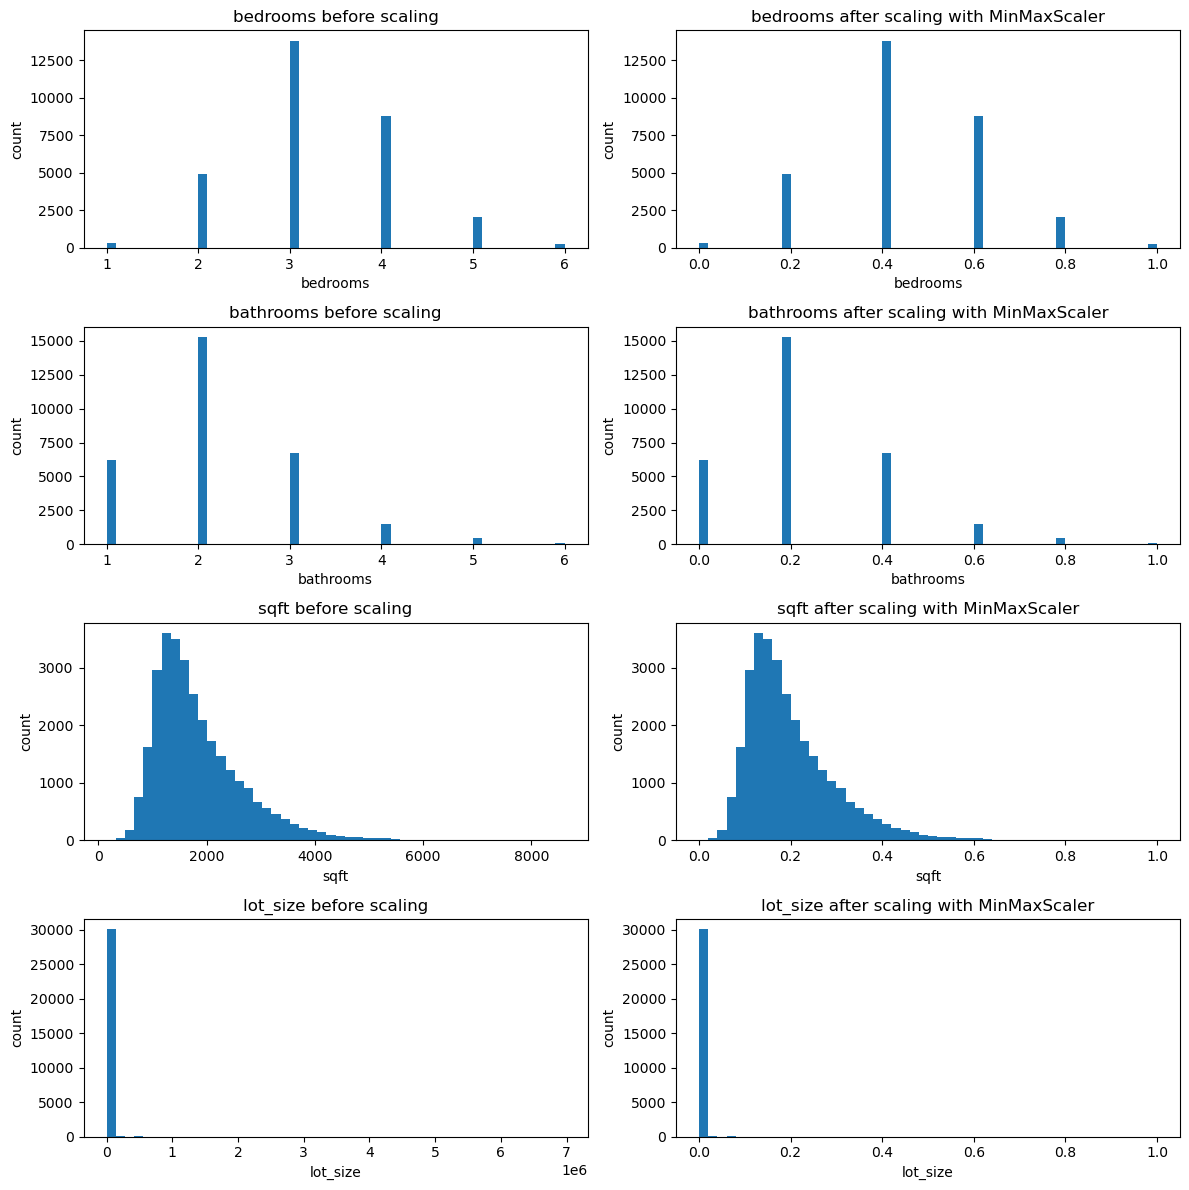

In [67]:
# call function with minmax
mm_scaler = MinMaxScaler(feature_range=(0, 1))
visualize_scaler(scaler=mm_scaler, df=train, features_to_scale=to_scale, bins=50)

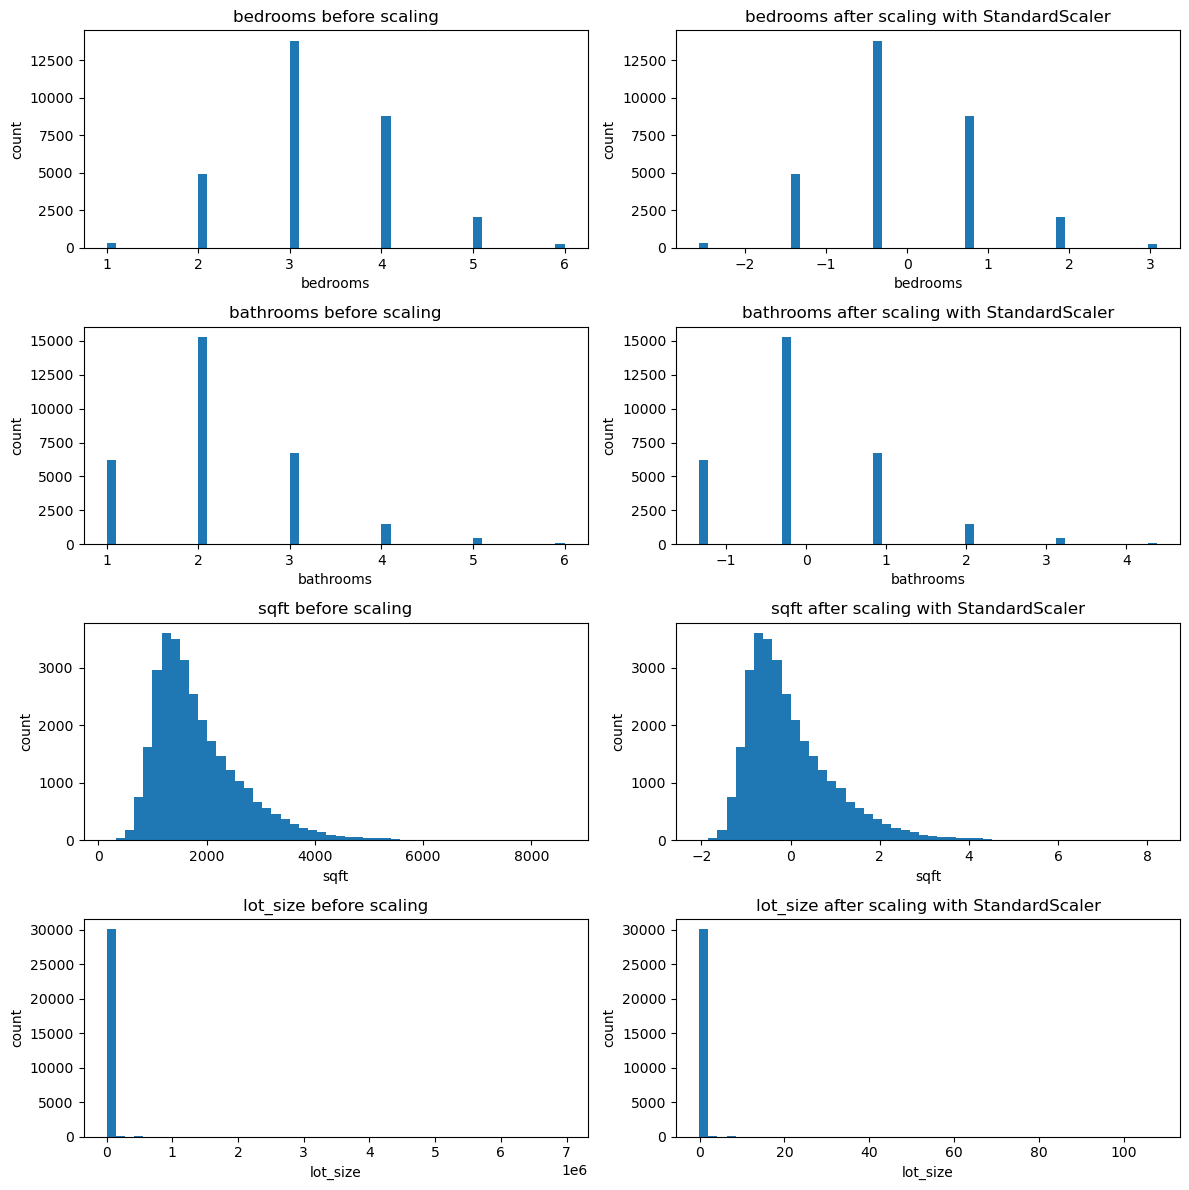

In [74]:
# call function with standardsca
standard_scaler = StandardScaler()
visualize_scaler(scaler=standard_scaler, df=train, features_to_scale=to_scale, bins=50)

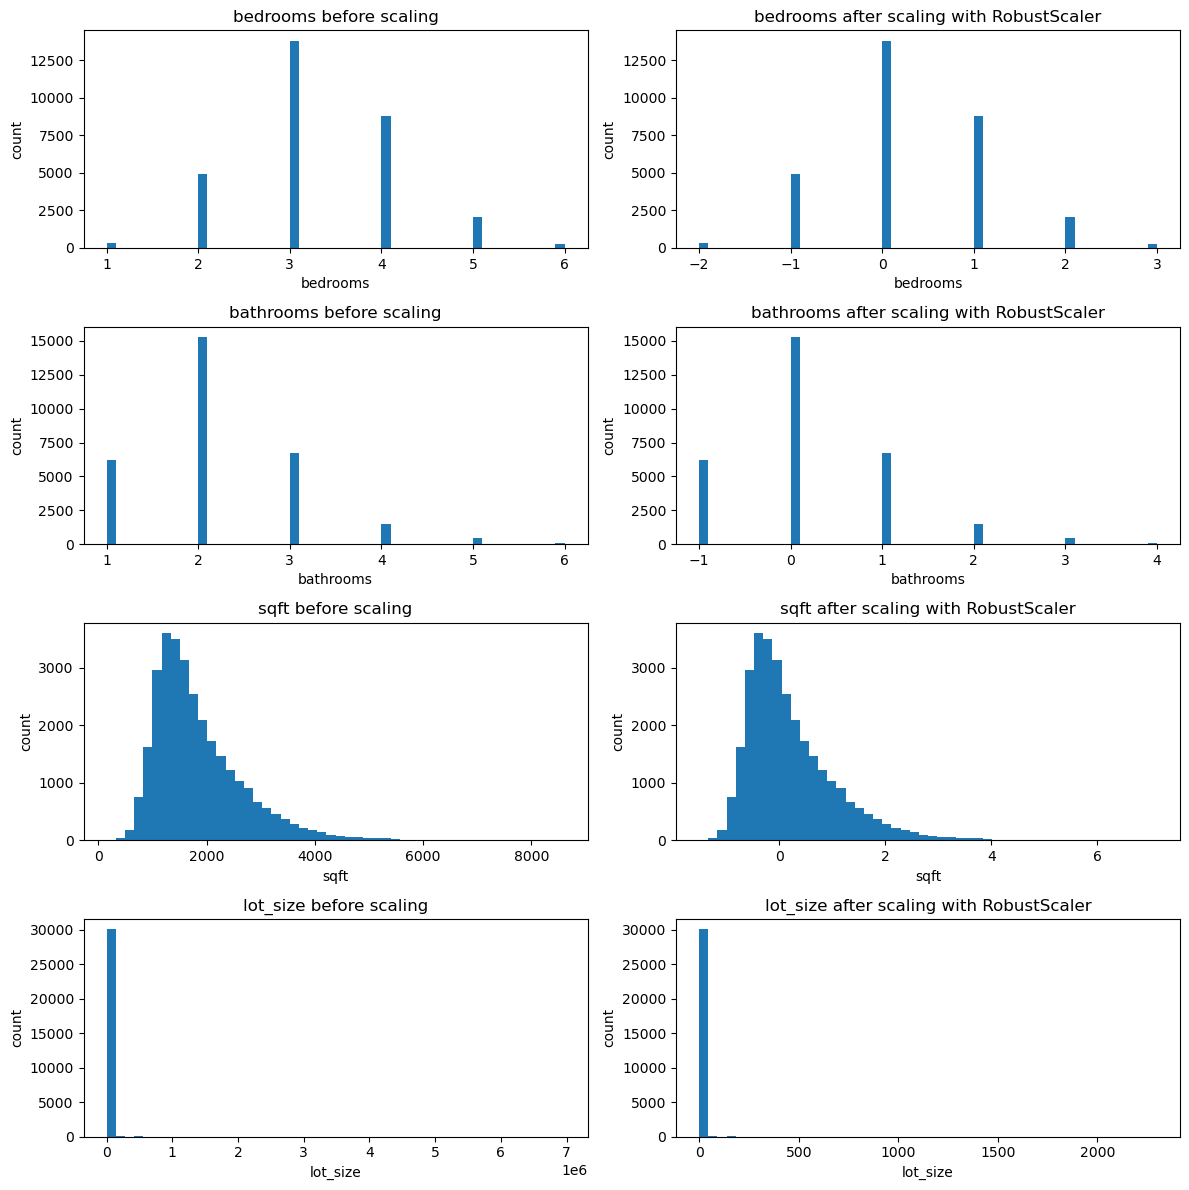

In [76]:
# call function with robustscaler
r_scaler = RobustScaler()
visualize_scaler(scaler=r_scaler, df=train, features_to_scale=to_scale, bins=50)

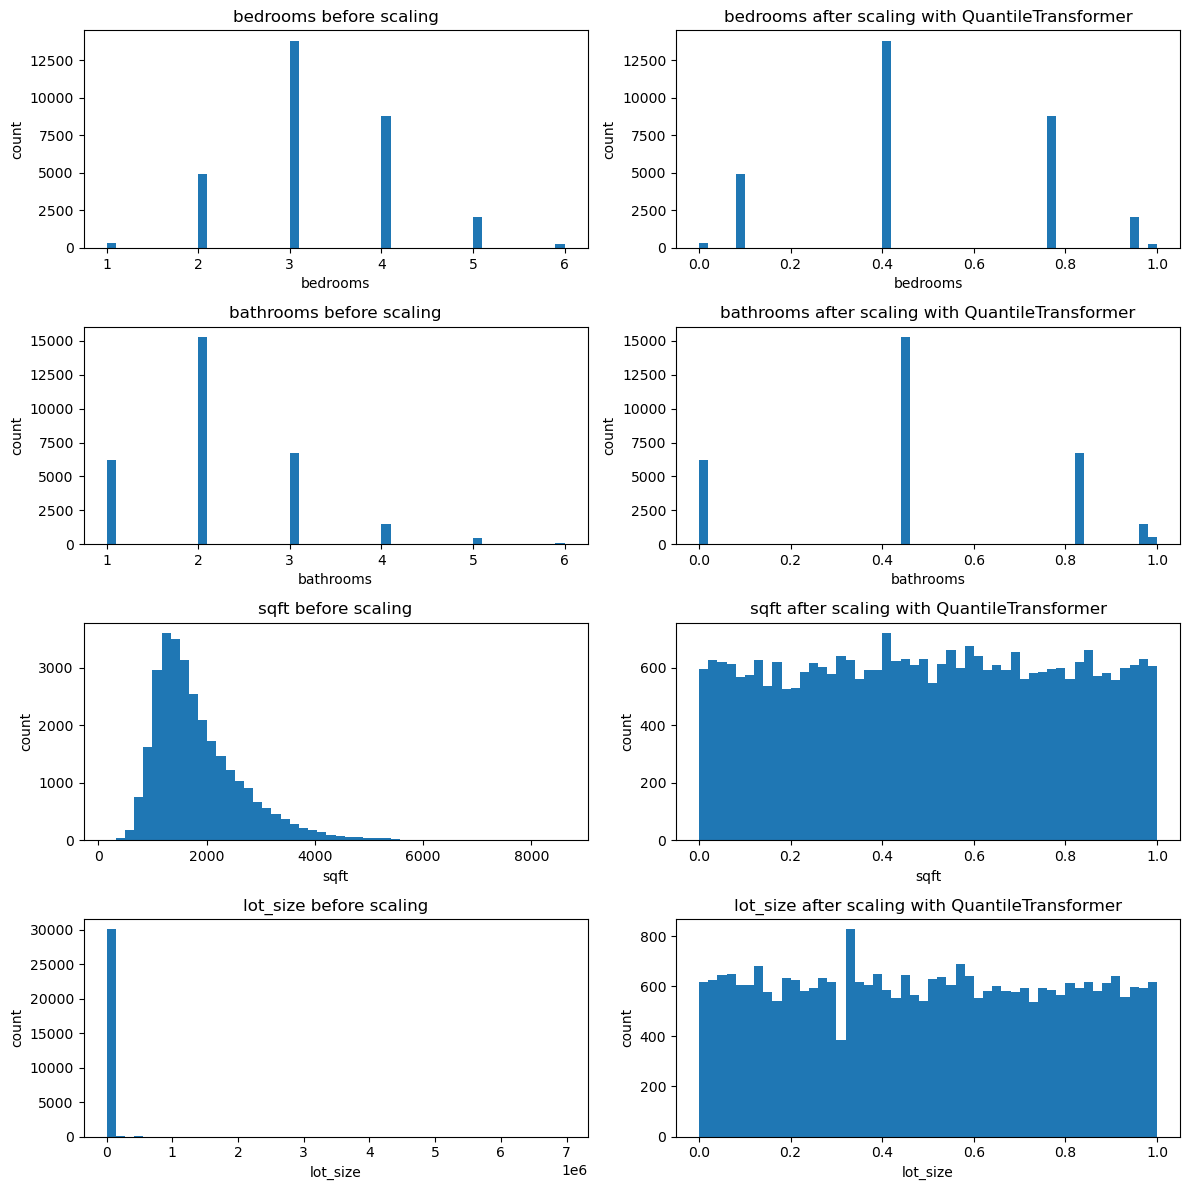

In [77]:
# call function using QuantileTransformer

qt_scaler = QuantileTransformer()
visualize_scaler(scaler=qt_scaler, df=train, features_to_scale=to_scale, bins=50)


In [ ]:
# train_county = train.county
# validate_county = validate.county
# test_county = test.county


In [ ]:
# train, validate, test = w.scaled_data(train, validate, test)

In [ ]:
X_train, y_train, X_validate,y_validate,X_test,y_test = w.x_y_split(train, validate, test)

In [ ]:
X_train.head()

In [ ]:
def plot_variable_pairs():
    train_sample = train.sample(n=1000)
    features = ['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'longitude','latitude']
    for feature in features:
        columns = train.select_dtypes('int')
    for feature in features:
        sns.lmplot(x= feature, y="tax_value", data=train, featue = 'county', hue = 'county', line_kws={'color': 'red'})
plot_variable_pairs()

In [ ]:
def plot_categorical_and_continuous_vars():
    train_sample = train.sample(n=1000)
    features =  train.select_dtypes('int') #['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'longitude','latitude']
    for feature in features:
        sns.set(rc={'figure.figsize':(20,10)})
        fig, axes = plt.subplots(2,2)
        sns.boxplot(x= feature, y="tax_value", data=train, hue = 'county')axs[0,0].set_title('boxplot')
        sns.barplot(x= feature, y="tax_value", data=train, hue = 'county')axs[0,1].set_title('barplot')
        sns.violinplot(x= feature, y="tax_value", data=train, hue = 'county')axs[1,0].set_title('violinplot')
        sns.scatterplot(x= feature, y="tax_value", data=train, hue = 'county')axs[1,1].set_title('scatterplot')
plot_categorical_and_continuous_vars()

# ax = axs[0,0]
# , ax = axs[0,1]
# , ax = axs[1,0]
# , ax = axes[1,1]

In [ ]:
plot_categorical_and_continuous_vars()